In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('Dados/dataset_olist_preparado.csv', parse_dates=['order_purchase_timestamp','order_delivered_customer_date', 'order_estimated_delivery_date'])

In [5]:
df['ano_mes'] = df['order_purchase_timestamp'].dt.to_period('M').astype(str)
df['tempo_entrega'] = (pd.to_datetime(df['order_delivered_customer_date']) - pd.to_datetime(df['order_purchase_timestamp'])).dt.days


In [6]:
vendas_mensais = df.groupby('ano_mes')['price'].sum().reset_index()

fig = px.line(vendas_mensais, x='ano_mes', y='price', title='Evolução das Vendas Mensais')
fig.show()


In [7]:
filtro = df.groupby(['customer_state', 'product_category_name_english'])['price'].sum().reset_index()

fig = px.sunburst(filtro,
                  path=['customer_state', 'product_category_name_english'],
                  values='price',
                  title='Faturamento por Estado e Categoria')
fig.show()


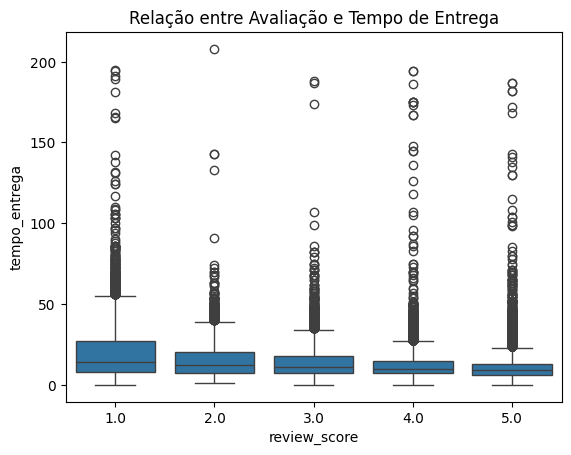

In [9]:
sns.boxplot(x='review_score', y='tempo_entrega', data=df)
plt.title('Relação entre Avaliação e Tempo de Entrega')
plt.show()

